<a href="https://colab.research.google.com/github/RtjShreyD/CV-DL/blob/master/SortingContours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow

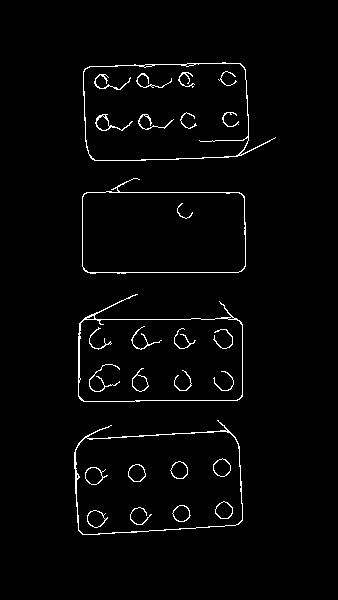

In [11]:
def draw_contour(image, c, i):
	# compute the center of the contour area and draw a circle
	# representing the center
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
 
	# draw the countour number on the image
	cv2.putText(image, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
		1.0, (255, 255, 255), 2)
 
	# return the image with the contour number drawn on it
	return image

def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
 
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
 
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
 
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
 
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)
 
image = cv2.imread("image_01.png")
accumEdged = np.zeros(image.shape[:2], dtype="uint8")
 
# loop over the blue, green, and red channels, respectively
for chan in cv2.split(image):
	# blur the channel, extract edges from it, and accumulate the set
	# of edges for the image
	chan = cv2.medianBlur(chan, 11)
	edged = cv2.Canny(chan, 50, 200)
	accumEdged = cv2.bitwise_or(accumEdged, edged)
 
# show the accumulated edge map
cv2_imshow(accumEdged)

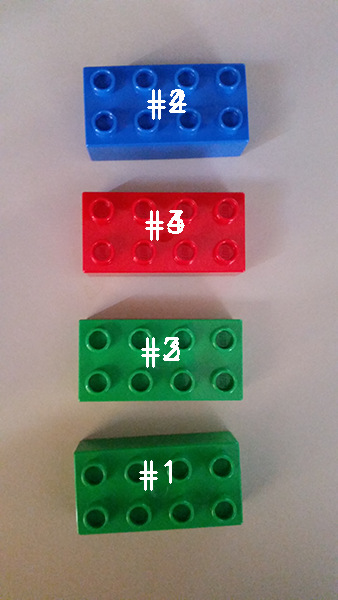

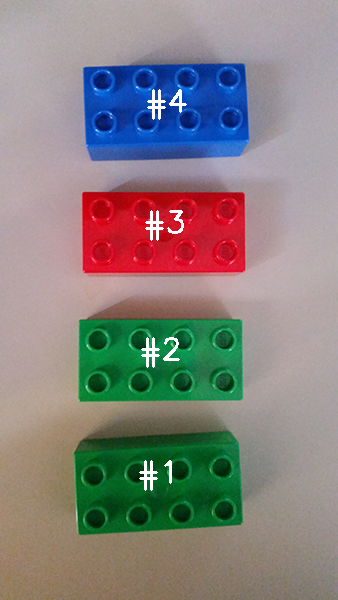

-1

In [14]:
# find contours in the accumulated image, keeping only the largest
# ones
cnts = cv2.findContours(accumEdged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]
orig = image.copy()
 
# loop over the (unsorted) contours and draw them
for (i, c) in enumerate(cnts):
	orig = draw_contour(orig, c, i)
 
# show the original, unsorted contour image
cv2_imshow(orig)
 
# sort the contours according to the provided method
(cnts, boundingBoxes) = sort_contours(cnts, method=["left-to-right"])
 
# loop over the (now sorted) contours and draw them
for (i, c) in enumerate(cnts):
	draw_contour(image, c, i)
 
# show the output image
cv2_imshow(image)
cv2.waitKey(0)